In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('ECOMNSA.csv')
meta=pd.read_json('e-commerce-retail-sales_metadata.json')['seriess'][0]
meta

{'id': 'ECOMNSA',
 'realtime_start': '2019-12-06',
 'realtime_end': '2019-12-06',
 'title': 'E-Commerce Retail Sales',
 'observation_start': '1999-10-01',
 'observation_end': '2019-07-01',
 'frequency': 'Quarterly',
 'frequency_short': 'Q',
 'units': 'Millions of Dollars',
 'units_short': 'Mil. of $',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2019-11-19 09:16:02-06',
 'popularity': 31,
 'notes': 'E-commerce sales are sales of goods and services where  the buyer places an order, or the price and terms  of the sale  are negotiated over an Internet, mobile device  (M-commerce),  extranet,  Electronic  Data  Interchange  (EDI)  network,  electronic  mail,  or  other  comparable  online  system.  Payment  may  or  may  not  be  made online.'}

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  80 non-null     object 
 1   realtime_end    80 non-null     object 
 2   date            80 non-null     object 
 3   value           80 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.6+ KB


In [4]:
data.head(7)

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1999-10-01,5241.0
1,2019-12-06,2019-12-06,2000-01-01,5553.0
2,2019-12-06,2019-12-06,2000-04-01,6059.0
3,2019-12-06,2019-12-06,2000-07-01,6892.0
4,2019-12-06,2019-12-06,2000-10-01,9104.0
5,2019-12-06,2019-12-06,2001-01-01,7923.0
6,2019-12-06,2019-12-06,2001-04-01,7816.0


In [17]:
data['date']=pd.to_datetime(data['date'])
realtime_start=data.realtime_start[0]
realtime_end=data.realtime_end[0]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 1999-10-01 to 2019-07-01
Freq: QS-OCT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [ ]:
df=data[['date','value']]
df.set_index("date",inplace=True)
df.index.freq = 'QS-OCT'
df.info()

In [7]:
df.head(7)

,value
date,
1999-10-01,5241.0
2000-01-01,5553.0
2000-04-01,6059.0
2000-07-01,6892.0
2000-10-01,9104.0
2001-01-01,7923.0
2001-04-01,7816.0


<Figure size 1800x500 with 0 Axes>

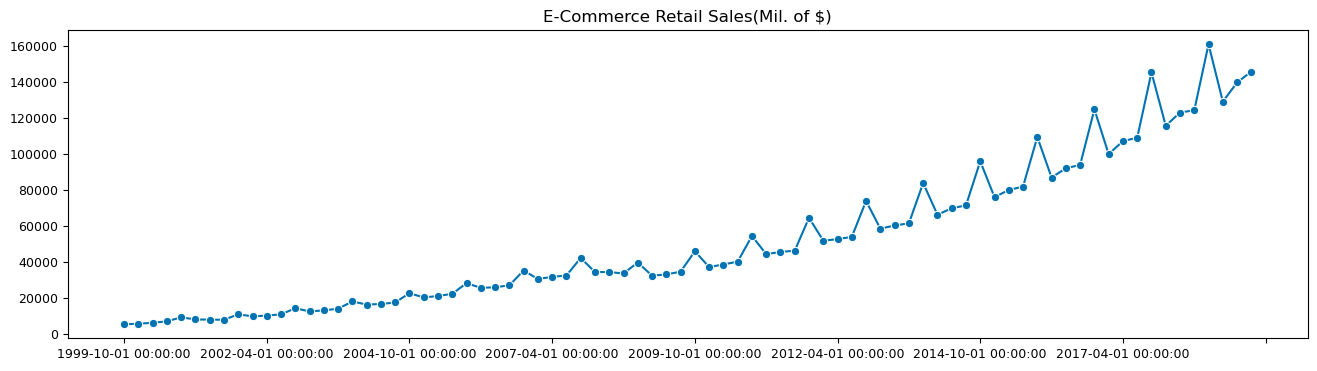

In [8]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
plot_series(df)
plt.title('E-Commerce Retail Sales(Mil. of $)')
plt.tick_params(labelsize=9)

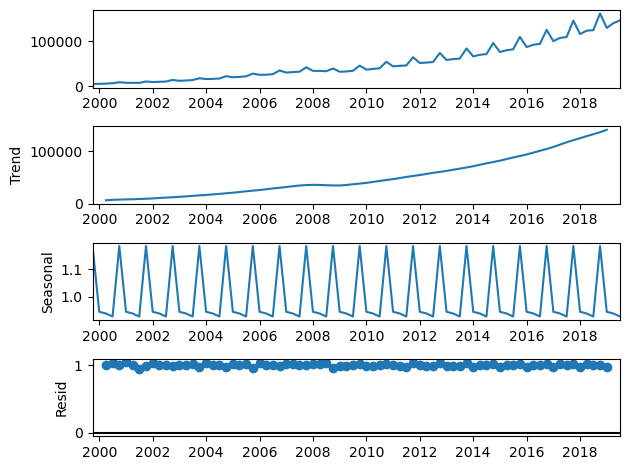

In [9]:
import statsmodels.tsa.seasonal as decomp

decomp_series=decomp.seasonal_decompose(df,model='multiplicative')
decomp_series.plot()
plt.show()

C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


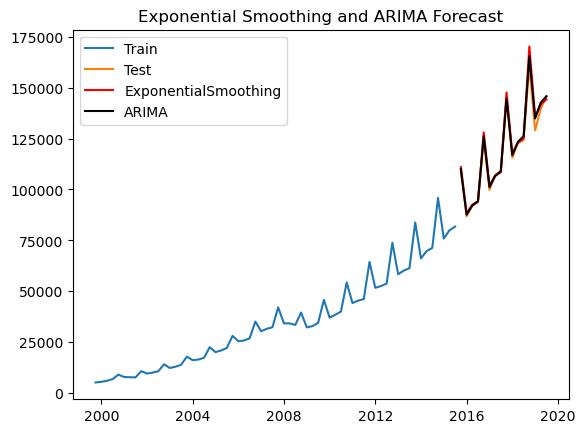

ES MAPE  0.016948638345269388
ARM MAPE 0.011315777346619068


In [18]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

ES = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=4).fit()
ES_predictions = ES.forecast(steps=len(test))
ES_error=mean_absolute_percentage_error(test,ES_predictions)

Arima_model = ARIMA(train, order=(1, 1, 0), seasonal_order=(2, 1, 2, 4)).fit()
ARM_predictions = Arima_model.forecast(steps=len(test))
ARM_error=mean_absolute_percentage_error(test,ARM_predictions)

# start_date = y_test.index.min()
# end_date = y_test.index.max()
# predictions = model_fit.predict(start=start_date, end=end_date)


plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(ES_predictions.index, ES_predictions, label='ExponentialSmoothing', color='red')
plt.plot(ARM_predictions.index, ARM_predictions, label='ARIMA', color='black')
plt.legend()
plt.title('Exponential Smoothing and ARIMA Forecast')
plt.show()

print("ES MAPE ",ES_error)
print("ARM MAPE",ARM_error)

In [11]:
# train_part=[.8,.78,.76,.74,.72,.70,.68,.65]
ES_error_arr=[]
ES_mean_squared_error=[]

ARM_error_arr=[]
ARM_mean_squared_error=[]

for i in np.arange(.8, .65, -0.01, dtype=float):

    train_size = int(len(df) * i)
    train, test = df[:train_size], df[train_size:]

    ES = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=4).fit()
    ES_predictions = ES.forecast(steps=len(test))
    
    ES_error_arr.append(mean_absolute_percentage_error(test,ES_predictions))
    ES_mean_squared_error.append(mean_squared_error(test,ES_predictions))
    
    
    Arima_model = ARIMA(train, order=(1, 1, 0), seasonal_order=(2, 1, 2, 4)).fit()
    ARM_predictions = Arima_model.forecast(steps=len(test))
    
    
    ARM_error_arr.append(mean_absolute_percentage_error(test,ARM_predictions))
    ARM_mean_squared_error.append(mean_squared_error(test,ARM_predictions))

C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

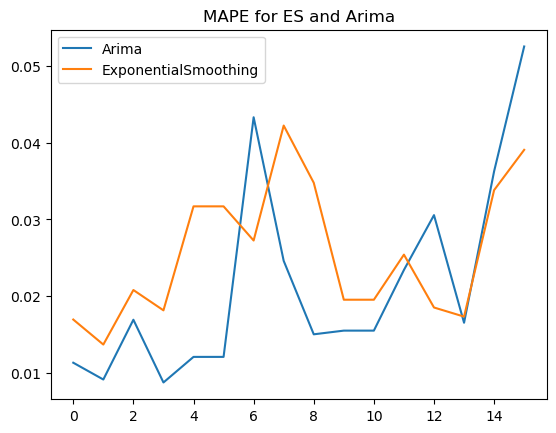

In [19]:
plt.plot(ARM_error_arr, label='Arima')
plt.plot(ES_error_arr, label='ExponentialSmoothing')
plt.legend()
plt.title('MAPE for ES and Arima')
plt.show()

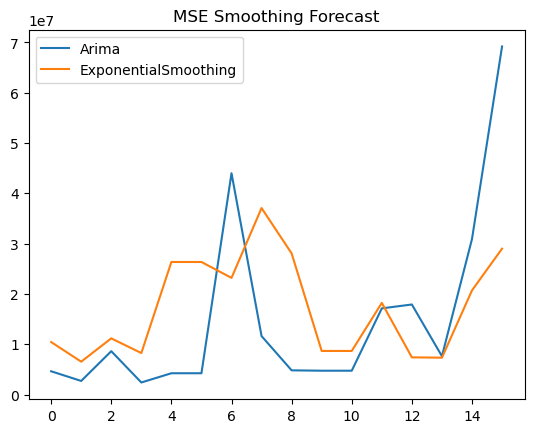

In [20]:
plt.plot(ARM_mean_squared_error, label='Arima')
plt.plot(ES_mean_squared_error, label='ExponentialSmoothing')
plt.legend()
plt.title('MSE Smoothing Forecast')
plt.show()

In [14]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

Arima_model = ARIMA(train, order=(1, 1, 0), seasonal_order=(2, 1, 2, 4)).fit()
Arima_model.save('model.pkl')

C:\Users\koles\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
